In [2]:
## LOAD MODULES ##
# Third Party
import sys
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
import psyplot.project as psy
import pandas as pd
import xarray
from netCDF4 import Dataset,date2num
import xarray as xr
from matplotlib import cm
import datetime as dt
from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray

# First Party
sys.path.append('../utilities_tlezuo/')
# from timefunctions import *
import varfunctions as vf
import locfunctions as lf
import get_stations_timeseries as gs

###############################################################################################
# define class of pc_dict
class Point_coordinates:
    def __init__(self, shortname, name, color, marker, lat, lon, altitude, iconID, iconHSURF, iconHHL, iconHFL, height_dict):
        self.short = shortname
        self.name = name
        self.color = color
        self.marker = marker
        self.lat = lat
        self.lon = lon
        self.alt = altitude
        self.iconID = iconID 
        self.iconHSURF = iconHSURF
        self.iconHHL = iconHHL
        self.iconHFL = iconHFL
        self.hdict = height_dict 


# load pc_dict and its lists
pc_dict = np.load('../utilities_tlezuo/pc_dict.npy',allow_pickle=True).item()

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
###############################################################################################
## DECIDE WHAT TO LOAD ##
# variables
spvars_list=[vf.T_2M,vf.VEL_10M,vf.DIR_10M,vf.TKEs]#,vf.SW_d]
# location
loc = pc_dict['kols']
# type of icon data: std, hf, int
icon_type = 'std' 

In [46]:
# ts_data_icon_RUN2 = xarray.open_mfdataset('/store/s83/tlezuo/RUN2_reference/out_std/lfff*')
# ts_data_icon_RUN2_surf_kols = ts_data_icon_RUN2.sel(ncells=loc.iconID,height=81,height_3=80,height_4=81)
# ts_data_icon_RUN2.T_2M
# ts_data_icon_RUN2_surf_kols.T

In [4]:
###############################################################################################
## LOAD DATA ICON TS ##
if icon_type == 'std':# standard (15min)
    #run2
    ts_data_icon_RUN2 = xarray.open_mfdataset('/store/s83/tlezuo/RUN2_reference/out_std/lfff*')
    ts_data_icon_RUN2 = ts_data_icon_RUN2.sel(ncells=loc.iconID,height=81,height_3=80,height_4=81)
    #run3
    ts_data_icon_RUN3 = xarray.open_mfdataset('/store/s83/tlezuo/RUN3_noconv/out_std/lfff*')
    ts_data_icon_RUN3 = ts_data_icon_RUN3.sel(ncells=loc.iconID,height=81,height_3=80,height_4=81)
    #run4
    ts_data_icon_RUN4 = xarray.open_mfdataset('/store/s83/tlezuo/RUN4_cosmolev/out_std/lfff*')
    ts_data_icon_RUN4 = ts_data_icon_RUN4.sel(ncells=loc.iconID,height=81,height_3=80,height_4=81)
elif icon_type == 'hf': # high frequency (10s)
    #run2
    ts_data_icon_RUN2 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN2_reference.nc')
    ts_data_icon_RUN2 = ts_data_icon_RUN2.sel(ncells=loc.subsetID)
    #run3
    ts_data_icon_RUN3 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN3_noconv.nc')
    ts_data_icon_RUN3 = ts_data_icon_RUN3.sel(ncells=loc.subsetID)
    #run4
    ts_data_icon_RUN4 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN4_cosmolev.nc')
    ts_data_icon_RUN4 = ts_data_icon_RUN4.sel(ncells=loc.subsetID)
elif icon_type == 'int' :# integrated (1h)
    #run2
    ts_data_icon_RUN2 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/intsu_ts_data_RUN2_reference.nc')
    ts_data_icon_RUN2 = ts_data_icon_RUN2.sel(ncells=loc.subsetID)
    #run3
    ts_data_icon_RUN3 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/intsu_ts_data_RUN3_noconv.nc')
    ts_data_icon_RUN3 = ts_data_icon_RUN3.sel(ncells=loc.subsetID)
    #run4
    ts_data_icon_RUN4 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/intsu_ts_data_RUN4_cosmolev.nc')
    ts_data_icon_RUN4 = ts_data_icon_RUN4.sel(ncells=loc.subsetID)

In [14]:
ts_data_icon_RUN1 = xarray.open_mfdataset('/store/s83/swester/teamx/tdf_2019091212/output/19091212/lfff*')
ts_data_icon_RUN1 = ts_data_icon_RUN1.sel(ncells=loc.iconID,height=81,height_3=80,height_4=81)

5
found T_2M as tair2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Kolsass_FLUXL12_7e207498/data.csv
found VEL_10M as meanu2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Kolsass_FLUXL12_7e207498/data.csv
found DIR_10M as wind_dir2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Kolsass_FLUXL12_7e207498/data.csv
found TKEs as meantke1 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Kolsass_FLUXL12_7e207498/data.csv
found T_2M as tair2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Kolsass_FLUXL3_672be429/data.csv


Text(0.8, 0.88, 'obs at 4.0m')

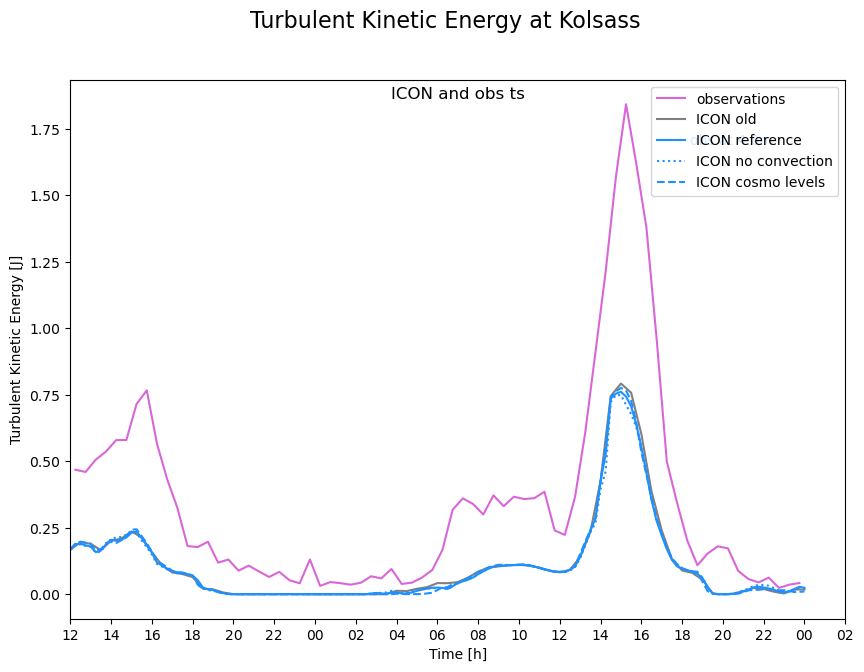

In [16]:
##################################################################################################
## SINGLE PLOT ##
spvar=vf.TKEs
loc = pc_dict['kols']

# time range
startdate_plot = dt.datetime(2019,9,12,12,00)
enddate_plot = dt.datetime(2019,9,14,2,00)
plotfreq_plot = '2h0min'
plotdates_plot = pd.date_range(startdate_plot,enddate_plot,freq=plotfreq_plot)

# figure settings
fig, ax_ts = plt.subplots(1,1, figsize=(10,7))
fig.suptitle(spvar.title+' at '+loc.name, fontsize=16)

##################################################################################################
## LOAD AND PLOT ##
# OBS
ts_data_stat = gs.read_acinn(loc=loc, 
                    vars=spvars_list,
                    path_ACINN= '/users/tlezuo/data/stations/ACINNiBox',
                    start_time = dt.datetime(2019,9,12,12,00).strftime("%Y-%m-%d %H:%M:%S"),
                    end_time = dt.datetime(2019,9,14,00,00).strftime("%Y-%m-%d %H:%M:%S"),
                    correct_direction=True)
ts_data_stat['dt'] = pd.to_datetime(ts_data_stat["timestamp"])
ax_ts.plot(ts_data_stat['dt'],np.transpose(ts_data_stat[spvar.name]),color='m',alpha=0.6, label='observations')

# ICON 
plotdates_model = pd.date_range(startdate_plot,enddate_plot,freq='0h15min')
ax_ts.plot(ts_data_icon_RUN1.time,ts_data_icon_RUN1.TKE,color='gray',label='ICON old')
ax_ts.plot(ts_data_icon_RUN2.time,ts_data_icon_RUN2.TKE,color='dodgerblue',label='ICON reference')
ax_ts.plot(ts_data_icon_RUN3.time,ts_data_icon_RUN3.TKE,color='dodgerblue',linestyle = 'dotted', label='ICON no convection')
ax_ts.plot(ts_data_icon_RUN4.time,ts_data_icon_RUN4.TKE,color='dodgerblue',linestyle = 'dashed',label='ICON cosmo levels')

# plotting options
# ax_ts.set_ylim(spvar.min,spvar.max)
ax_ts.set_xlim(startdate_plot,enddate_plot)
# ax_ts.grid()
ax_ts.set_title('ICON and obs ts', y=1.0, pad=-14)
ax_ts.set_xlabel('Time [h]')
ax_ts.set_xticks(plotdates_plot)
ax_ts.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax_ts.set_ylabel(spvar.title+' '+spvar.units)
ax_ts.legend()
ax_ts.annotate('obs at '+str(loc.hdict[spvar.name])+'m', xy=(0.8,0.2),xytext=(0.8,0.88),xycoords=('axes fraction','axes fraction'),color='dodgerblue')